<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/Review_Toko_Baju_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


Load dan Eksplorasi Dataset

In [3]:
# Load data
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/04.%20Week%204/Dataset/ReviewTokoBaju.csv"
df = pd.read_csv(url)

# Hapus data kosong pada Review Text
df = df.dropna(subset=['Review Text'])

# Ambil kolom yang dibutuhkan
texts = df['Review Text'].values
labels = df['Recommended IND'].values


Preprocessing (Tokenizing dan Padding)

In [4]:
# Parameter
num_words = 30000
maxlen = 500

# Tokenizer
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=maxlen)

# Label
y = np.array(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Deep RNN (SimpleRNN)

In [5]:
model = Sequential([
    Embedding(input_dim=30000, output_dim=128, input_length=500),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.3),
    SimpleRNN(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training

In [6]:
# Latih model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.7786 - loss: 0.5271 - val_accuracy: 0.8073 - val_loss: 0.4609
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.8517 - loss: 0.3554 - val_accuracy: 0.8540 - val_loss: 0.3018
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.9155 - loss: 0.2100 - val_accuracy: 0.8692 - val_loss: 0.3392
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9555 - loss: 0.1161 - val_accuracy: 0.8645 - val_loss: 0.4214
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.9817 - loss: 0.0622 - val_accuracy: 0.8659 - val_loss: 0.5545
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9905 - loss: 0.0328 - val_accuracy: 0.8579 - val_loss: 0.6995
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.9939 - loss: 0.0182 - val_accuracy: 0.8482 - val_loss: 0.8029
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.9924 - loss: 0.0240 - val

Evaluasi Model

In [7]:
# Prediksi
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Evaluasi
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_probs)

print(f"Akurasi  : {acc:.4f}")
print(f"Presisi  : {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")


142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step
Akurasi  : 0.8658
Presisi  : 0.8932
Recall   : 0.9500
F1 Score : 0.9207
AUC      : 0.8482


Visualisasi Akurasi dan Loss

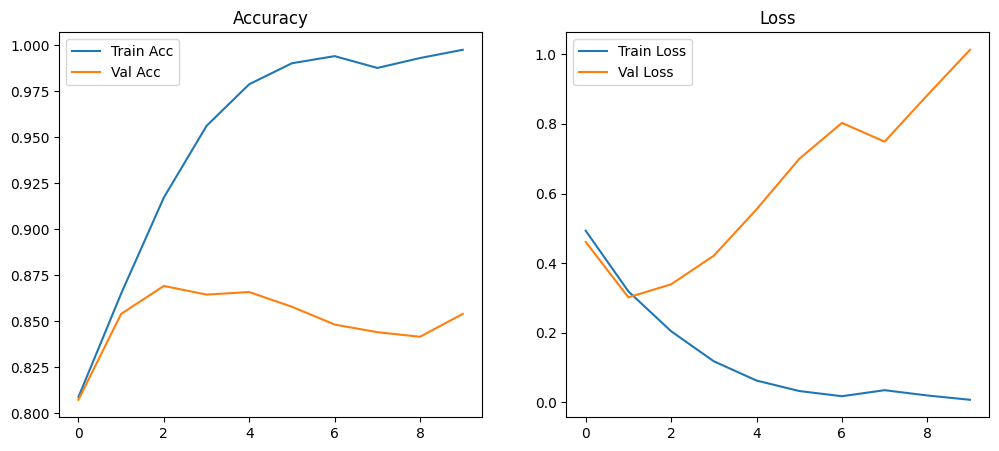

In [8]:
# Plot Accuracy dan Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()


ROC Curve

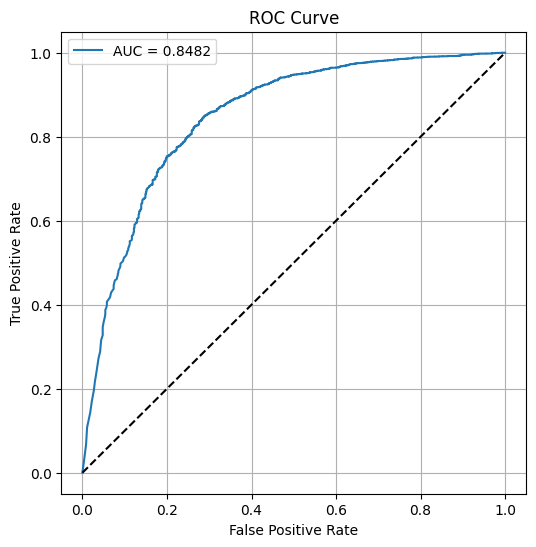

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
!pip install -q -U keras-tuner

import keras_tuner as kt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.6 MB/s eta 0:00:00


Definisikan Fungsi Model Tuning

In [11]:
def build_model(hp):
    model = Sequential()
    model.add(Embedding(
        input_dim=30000,
        output_dim=hp.Choice('embedding_dim', [64, 128, 256]),
        input_length=500
    ))

    # Stack 1–2 RNN layers
    for i in range(hp.Int('rnn_layers', 1, 2)):
        model.add(SimpleRNN(
            units=hp.Int(f'rnn_units_{i}', min_value=32, max_value=128, step=32),
            return_sequences=(i < 1)
        ))
        model.add(Dropout(hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)))

    model.add(Dense(
        hp.Int('dense_units', 32, 128, step=32),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_dense', 0.2, 0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


Inisialisasi dan Jalankan Tuner

In [12]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='deep_rnn_tuner',
    project_name='review_tokobaju'
)

tuner.search_space_summary()

tuner.search(X_train, y_train,
             epochs=5,
             validation_split=0.2,
             verbose=1)


Trial 5 Complete [00h 04m 10s]
val_accuracy: 0.807341992855072

Best val_accuracy So Far: 0.874965488910675
Total elapsed time: 00h 18m 11s


Konfigurasi Terbaik & Latih Ulang

In [13]:
# Ambil konfigurasi terbaik
best_hps = tuner.get_best_hyperparameters(1)[0]

# Cetak hasil terbaik
print("=== Best Configuration ===")
print(f"Best Embedding Dim : {best_hps.get('embedding_dim')}")
print(f"Best RNN Units     : {[best_hps.get(f'rnn_units_{i}') for i in range(best_hps.get('rnn_layers'))]}")
print(f"Best Dense Units   : {best_hps.get('dense_units')}")
print(f"Best Optimizer     : {best_hps.get('optimizer')}")

# Build dan latih ulang model
model = tuner.hypermodel.build(best_hps)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)


=== Best Configuration ===
Best Embedding Dim : 256
Best RNN Units     : [32, 32]
Best Dense Units   : 32
Best Optimizer     : rmsprop
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


114/114 ━━━━━━━━━━━━━━━━━━━━ 30s 178ms/step - accuracy: 0.7995 - loss: 0.4702 - val_accuracy: 0.8548 - val_loss: 0.4805
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.8804 - loss: 0.2783 - val_accuracy: 0.8540 - val_loss: 0.3147
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.9084 - loss: 0.2327 - val_accuracy: 0.8515 - val_loss: 0.3237
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9303 - loss: 0.1758 - val_accuracy: 0.8733 - val_loss: 0.5485
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9548 - loss: 0.1294 - val_accuracy: 0.8692 - val_loss: 0.3980
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.9736 - loss: 0.0797 - val_accuracy: 0.8708 - val_loss: 0.5057
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9817 - loss: 0.0559 - val_accuracy: 0.8661 - val_loss: 0.6808
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9898 - loss: 0.0355 - val_accura